In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
## My data are in a 'data' directory, two steps above the current working directory
#
## getcwd: current directory
## .parent: parent directory
## os.path.join: create a path
#DATA_DIR_PATH = os.path.join(Path(os.getcwd()).parent.parent.absolute(),
#                            'data')
#DATA_DIR_PATH

'/data'

### Load lung disease data

In [6]:
LUNG_CSV = "LungDisease.csv"
#lung = pd.read_csv(os.path.join(DATA_DIR_PATH, LUNG_CSV))
lung = pd.read_csv(LUNG_CSV)
lung.head(10)

PEFR  Exposure
0   390         0
1   410         0
2   430         0
3   460         0
4   420         1
5   280         2
6   420         2
7   520         2
8   610         3
9   590         3

## Predict the response *PEFR* as a function of the feature *Exposure*
In the following, we will predict the worker *PEFR* as a function of *Exposure* to cotton dust. In asthma patients, Peak Expiratory Flow Rate (PEFR) measurement has been promoted as a useful tool for assessing airway obstruction and titrating therapy. It is not only cheap, but has high reproducibility and user compliance rates, making it a useful tool for ambulatory monitoring of asthma.

### Looking at the data

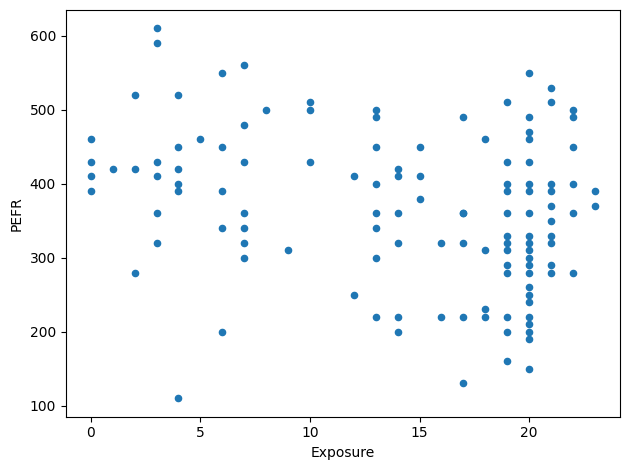

In [7]:
lung.plot.scatter(x='Exposure', y='PEFR')

plt.tight_layout()
plt.show()

### Using the *LinearRegression* model from *scikit-learn*

In [11]:
predictors = ['Exposure']
outcome = 'PEFR'

model = LinearRegression()
model.fit(lung[predictors].values, lung[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 424.583
Coefficient Exposure: -4.185


- **intercept**: Predicted PEFR for 0 years exposure (424.583)
- **regression coef.**: variation of the PEFR for each additional year of exposure. Here, each additional year induces a PEFR reduction of -4.185

### Make a summary graph showing *PEFR* variation as a function of *Exposure* variation

In [12]:
# Get two predictions with the method 'predict'
print(model.predict([[7.5], [17.5]]))
print(model.predict([[0], [23]]))

[393.19848293 351.35271808]
[424.58280657 328.33754741]


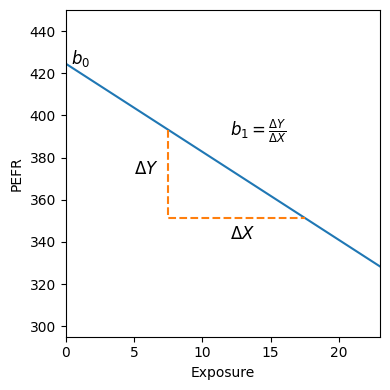

In [13]:
# Create a figure object and its axis, with a given size
fig, ax = plt.subplots(figsize=(4, 4))
# Set x and y limits
ax.set_xlim(0, 23)
ax.set_ylim(295, 450)
# Set x and y axis label
ax.set_xlabel('Exposure')
ax.set_ylabel('PEFR')
# Plot the regression line between x=0 and x=23
ax.plot((0, 23), model.predict([[0], [23]]))
ax.text(0.4, model.intercept_, r'$b_0$', size='larger')

# Define two 'new' x values for which predictions are required
x = [[7.5], [17.5]]
y = model.predict(x)
# Plot red dashed line
ax.plot((7.5, 7.5, 17.5), (y[0], y[1], y[1]), '--')
# Add text
ax.text(5, np.mean(y), r'$\Delta Y$', size='larger')
ax.text(12, y[1] - 10, r'$\Delta X$', size='larger')
ax.text(12, 390, r'$b_1 = \frac{\Delta Y}{\Delta X}$', size='larger')

plt.tight_layout()
plt.show()

### Fitted values and residuals

In [15]:
fitted = model.predict(lung[predictors].values)
residuals = lung[outcome] - fitted

In [16]:
# NB: the 'zip' function is an easy way to 'concatenate' lists,
# and is really useful when you need to loop on these lists together
for var_1, var_2, var_3 in zip(lung.Exposure, lung.PEFR, fitted):
    print("From lung.Exposure", var_1)
    print("From lung.PEFR", var_2)
    print("From fitted", var_3, '\n')

From lung.Exposure 0
From lung.PEFR 390
From fitted 424.582806573957 

From lung.Exposure 0
From lung.PEFR 410
From fitted 424.582806573957 

From lung.Exposure 0
From lung.PEFR 430
From fitted 424.582806573957 

From lung.Exposure 0
From lung.PEFR 460
From fitted 424.582806573957 

From lung.Exposure 1
From lung.PEFR 420
From fitted 420.39823008849555 

From lung.Exposure 2
From lung.PEFR 280
From fitted 416.2136536030341 

From lung.Exposure 2
From lung.PEFR 420
From fitted 416.2136536030341 

From lung.Exposure 2
From lung.PEFR 520
From fitted 416.2136536030341 

From lung.Exposure 3
From lung.PEFR 610
From fitted 412.0290771175727 

From lung.Exposure 3
From lung.PEFR 590
From fitted 412.0290771175727 

From lung.Exposure 3
From lung.PEFR 430
From fitted 412.0290771175727 

From lung.Exposure 3
From lung.PEFR 410
From fitted 412.0290771175727 

From lung.Exposure 3
From lung.PEFR 360
From fitted 412.0290771175727 

From lung.Exposure 3
From lung.PEFR 320
From fitted 412.02907711757

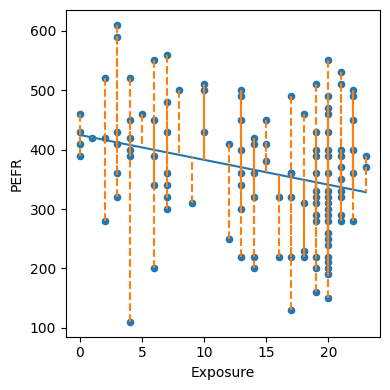

In [17]:
# Plot the datapoints, the regression lines and each error value

# plot data points
ax = lung.plot.scatter(x='Exposure', y='PEFR', figsize=(4, 4))
# plot the regression line
ax.plot(lung.Exposure, fitted)

# Plot a dashed line betwen the actual y value and its prediction
for x, yactual, yfitted in zip(lung.Exposure, lung.PEFR, fitted):
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.tight_layout()
plt.show()